In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower
from numpy import random
import math
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

Exam SMP E-2015, Assignment 4
==

In [3]:
A = [119, 130, 141, 123, 149, 156, 134, 108, 123, 138, 119, 156]
B = [112, 126, 145, 112, 138, 156, 130, 112, 112, 119, 112, 152]

In [7]:
df = pd.DataFrame({'Machine A': A,
                'Machine B': B})
df['Difference'] = df['Machine A']- df['Machine B']
df

,Machine A,Machine B,Difference
0,119,112,7
1,130,126,4
2,141,145,-4
3,123,112,11
4,149,138,11
5,156,156,0
6,134,130,4
7,108,112,-4
8,123,112,11
9,138,119,19


In [8]:
# a)
df.describe()

,Machine A,Machine B,Difference
count,12.000000,12.000000,12.000000
mean,133.000000,127.166667,5.833333
std,15.462565,16.813595,6.699163
min,108.000000,112.000000,-4.000000
25%,122.000000,112.000000,3.000000
50%,132.000000,122.500000,5.500000
75%,143.000000,139.750000,11.000000
max,156.000000,156.000000,19.000000


In [9]:
IQRA = 143-122
IQRB = 139.75-112

IQRA

21

In [10]:
IQRB

27.75

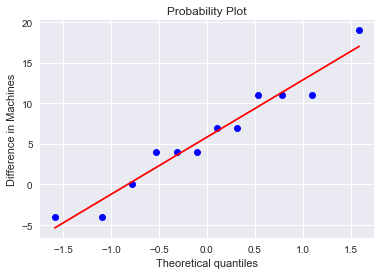

Skewness = 0.1835
Kurtosis = -0.4353


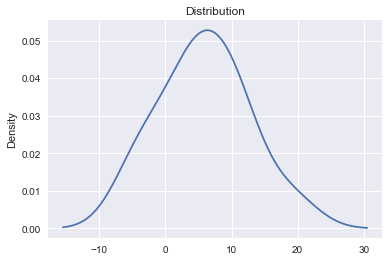

In [12]:
# b) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(df['Difference'], plot=plt)
plt.ylabel('Difference in Machines')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Difference']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Difference']),4)))
fig, ax = plt.subplots()
df['Difference'].plot.kde(ax=ax, legend=False, title='Distribution');

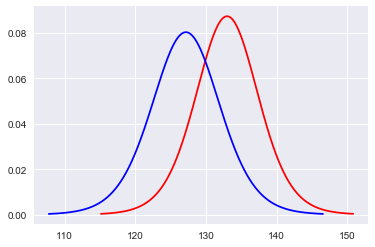

In [13]:
# Plotting
n1 = len(df['Machine A'])
SE1 = stats.sem(df['Machine A'])
mean1 = np.mean(df['Machine A'])

n2 = len(df['Machine B'])
SE2 = stats.sem(df['Machine B'])
mean2 = np.mean(df['Machine B'])

x1 = np.linspace(mean1-4*SE1, mean1+4*SE1, 1000)
x2 = np.linspace(mean2-4*SE2, mean2+4*SE2, 1000)

y1 = stats.t.pdf(x1, n1-1, mean1, SE1)
y2 = stats.t.pdf(x2, n2-1, mean2, SE2)

plt.plot(x1,y1, color='red')
plt.plot(x2,y2, color='blue')

plt.show()


In [14]:
val = stats.ttest_rel(df['Machine A'], df['Machine B'])

In [18]:
alpha = 0.05
stat = abs(round(val[0], 2))
pvalue = round(val[1], 3)
crit = abs(round(stats.t.ppf(alpha/2, n1-1), 2))

1. $\quad H_0: \mu_D = 0$ <br/> $\quad H_1: \mu_D \neq 0$

2. $\quad \alpha =$ {{alpha}}

3. $\quad p-value =$ {{pvalue}} and $stat =$ {{stat}}

4. $\quad$Reject if p-value < {{alpha}} or if stat > {{crit}}

5. $\quad$We reject the null hypothesis since {{pvalue}} < {{alpha}} and conclude  that the two machines give different measurements when $\alpha =$ {{alpha}}

In [20]:
# c)
diffmean = np.mean(df['Difference'])
diffmean

5.833333333333333

The p-value is the probability of obtaining a test result as extreme or more that the one which we actually got, if we assume that the machines are not different. That means that the probability of obtaining a difference of 5.83 or more is 0.012 if the machines er not different.

Exam SMP E-2016, Assignment 4
==

In [21]:
Before = [30.5, 18.5, 24.5, 32, 16, 15, 23.5, 25.5, 28, 18]
After = [23, 21, 22, 28.5, 14.5, 15.5, 24.5, 21, 23.5, 16.5]

df = pd.DataFrame({'Before': Before,
                'After': After})
df['Difference'] = df['Before']- df['After']
meandiff = np.mean(df['Difference'])

,Before,After,Difference
0,30.5,23.0,7.5
1,18.5,21.0,-2.5
2,24.5,22.0,2.5
3,32.0,28.5,3.5
4,16.0,14.5,1.5
5,15.0,15.5,-0.5
6,23.5,24.5,-1.0
7,25.5,21.0,4.5
8,28.0,23.5,4.5
9,18.0,16.5,1.5


In [22]:
df.describe()

,Before,After,Difference
count,10.000000,10.000000,10.000000
mean,23.150000,21.000000,2.150000
std,6.046349,4.377975,3.000463
min,15.000000,14.500000,-2.500000
25%,18.125000,17.625000,0.000000
50%,24.000000,21.500000,2.000000
75%,27.375000,23.375000,4.250000
max,32.000000,28.500000,7.500000


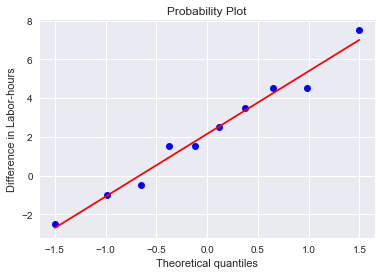

Skewness = 0.1328
Kurtosis = -0.7163


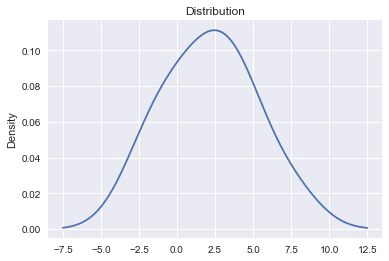

In [23]:
# We check for normality of the differences

stats.probplot(df['Difference'], plot=plt)
plt.ylabel('Difference in Labor-hours')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Difference']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Difference']),4)))
fig, ax = plt.subplots()
df['Difference'].plot.kde(ax=ax, legend=False, title='Distribution');

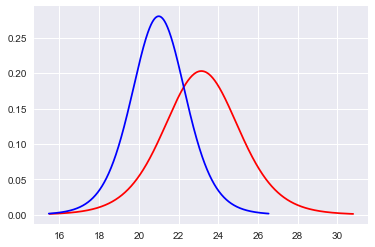

In [24]:
# Plotting
n1 = len(df['Before'])
SE1 = stats.sem(df['Before'])
mean1 = np.mean(df['Before'])

n2 = len(df['After'])
SE2 = stats.sem(df['After'])
mean2 = np.mean(df['After'])

x1 = np.linspace(mean1-4*SE1, mean1+4*SE1, 1000)
x2 = np.linspace(mean2-4*SE2, mean2+4*SE2, 1000)

y1 = stats.t.pdf(x1, n1-1, mean1, SE1)
y2 = stats.t.pdf(x2, n2-1, mean2, SE2)

plt.plot(x1,y1, color='red')
plt.plot(x2,y2, color='blue')

plt.show()

In [25]:
val = stats.ttest_rel(df['Before'], df['After'])

In [32]:
alpha = 0.05
stat = abs(round(val[0],2))
pvalue = round(val[1], 4)
crit = abs(round(stats.t.ppf(alpha,n1-1),2))

In [33]:
stat

2.27

In [34]:
pvalue

0.0497

In [35]:
crit

1.83

In [37]:
# b)

n = len(df['Difference'])
mean = np.mean(df['Difference'])
SE = stats.sem(df['Difference'])
Level = 0.9

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)
CI[0]

0.4106880271261186